In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
import csv
import pickle
import warnings
import time
import scipy
import pickle

<Figure size 432x288 with 0 Axes>

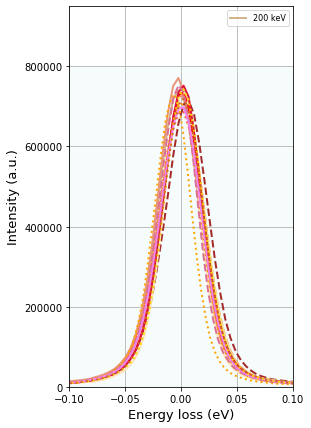

In [2]:
%run EELS-ZLP-Mar.py
%run Functions.ipynb

file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15 = \
pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),\
pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

file1['x'], file1['y'] = ZLP_100_x1, ZLP_100_y1
file2['x'], file2['y'] = ZLP_100_x2, ZLP_100_y2
file3['x'], file3['y'] = ZLP_100_x3, ZLP_100_y3
file4['x'], file4['y'] = ZLP_100_x4, ZLP_100_y4
file5['x'], file5['y'] = ZLP_100_x5, ZLP_100_y5
file6['x'], file6['y'] = ZLP_100_x6, ZLP_100_y6
file7['x'], file7['y'] = ZLP_100_x7, ZLP_100_y7
file8['x'], file8['y'] = ZLP_100_x8, ZLP_100_y8
file9['x'], file9['y'] = ZLP_100_x9, ZLP_100_y9
file10['x'], file10['y'] = ZLP_100_x10, ZLP_100_y10
file11['x'], file11['y'] = ZLP_100_x11, ZLP_100_y11
file12['x'], file12['y'] = ZLP_100_x12, ZLP_100_y12
file13['x'], file13['y'] = ZLP_100_x13, ZLP_100_y13
file14['x'], file14['y'] = ZLP_100_x14, ZLP_100_y14
file15['x'], file15['y'] = ZLP_100_x15, ZLP_100_y15

## Create binned array for each of the 15 data sets
Output: **meanfile** --> contains x, $y^{(exp)}$ 

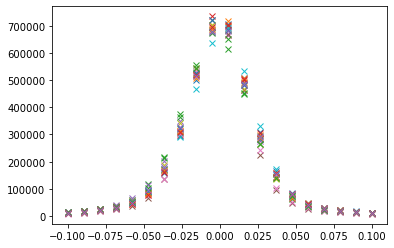

In [3]:
E_min = -0.1
E_max = 0.1
nbins = 20
meanfile = pd.DataFrame()

for i, file in enumerate([file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15]):
    
    zeropoint = file[file['y'] == file['y'].max()]['x']
    file['x_shifted'] = file['x'] - float(zeropoint)
   
    windowfile = file[(file['x_shifted'] > E_min) & (file['x_shifted'] < E_max)]
    x = np.linspace(E_min, E_max, nbins)
    meanfile['y%(s)s' %{"s": i}] = binned_statistics(windowfile.x_shifted, windowfile.y, nbins)[0]
    
    plt.plot(x, meanfile['y%(s)s' %{"s": i}], 'x')

## Create binned array for all data sets together
Output: **meanfile_big** --> contains x, $y^{(exp)}$ and $sigma^{(exp)}$

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14
0,13244.733333,13083.433333,12060.566667,14583.666667,14306.300000,10532.373333,9358.913333,13249.033333,11751.266667,11564.200000,11406.066667,12351.800000,13324.666667,11511.866667,11818.733333
1,17356.200000,18971.200000,18016.350000,18188.950000,19985.150000,13076.650000,12782.550000,18674.900000,16541.600000,15977.300000,16127.650000,16577.350000,18447.350000,15747.450000,16021.550000
2,22342.250000,26007.450000,24253.150000,25006.400000,27213.750000,17481.700000,18016.866667,25680.900000,22244.550000,21290.400000,21746.700000,21852.950000,24910.600000,21270.850000,21343.450000
3,32982.650000,36121.550000,33530.450000,34568.400000,39702.450000,26445.250000,26858.150000,37523.750000,31281.800000,29082.900000,29409.150000,29467.800000,34254.500000,29836.800000,29905.600000
4,52054.950000,54059.900000,58978.400000,51646.300000,65004.700000,37593.500000,43579.266667,57440.400000,46715.550000,50312.666667,49106.566667,44259.500000,51991.250000,43093.100000,49285.133333
5,86730.100000,89714.750000,116112.600000,86110.500000,112631.050000,67979.633333,77654.250000,93619.350000,89027.233333,93046.050000,92834.350000,81494.033333,102570.333333,76539.400000,95841.400000
6,157333.500000,168125.000000,216517.500000,160944.000000,200901.000000,137238.500000,137532.000000,174480.000000,187522.000000,167575.000000,174066.000000,168213.000000,212755.000000,162661.500000,179666.500000
7,295976.000000,314613.500000,374913.000000,306423.500000,348306.000000,299527.666667,300236.000000,321716.500000,341483.500000,290939.000000,324087.500000,311923.500000,364915.000000,310812.500000,327712.000000
8,500831.000000,516134.000000,554667.000000,522974.500000,530037.500000,541431.000000,528868.000000,523893.000000,543038.000000,468515.000000,526235.500000,507954.500000,544682.000000,517823.000000,516312.000000
9,684545.500000,702475.333333,671921.333333,734816.000000,681626.000000,719535.333333,684929.000000,695316.000000,703295.500000,636914.500000,721241.666667,687655.500000,675426.000000,694151.500000,676267.500000


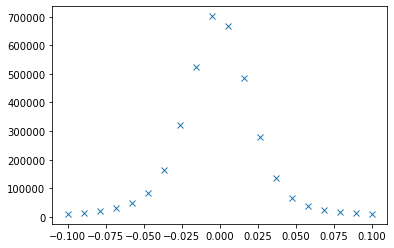

In [7]:
file0 = pd.DataFrame()
meanfile_big = pd.DataFrame()

nbins = 20
E_min = -0.1
E_max = +0.1

for i, files in enumerate([file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15]):
    
    # Shift spectra to have max at dE=0
    zeropoint = files[files['y'] == files['y'].max()]['x']
    files['x_shifted'] = files['x']  - float(zeropoint)
    
    #Create one big datafile from all the spectra
    bigfile = file0.append(files)
    file0 = bigfile
    
#Windo between E_min and E_max
windowfile_big = bigfile[(bigfile['x_shifted'] > E_min) & (bigfile['x_shifted'] < E_max)]
    
meanfile_big['x'] = np.linspace(E_min, E_max, nbins)
meanfile_big['y'] = binned_statistics(windowfile_big.x_shifted, windowfile_big.y, nbins)[0]
meanfile_big['sigma'] = binned_statistics(windowfile_big.x_shifted, windowfile_big.y, nbins)[1]
    
plt.plot(meanfile_big['x'], meanfile_big['y'], 'x')
        
meanfile_big.head()

meanfile

In [5]:
rho_matrix = np.zeros(shape=(nbins,nbins))
Nsp = 15

for i in range(nbins):
    for j in range(nbins):
        
        rho = np.zeros(shape=(Nsp))
        
        for k in range(Nsp):
            file = meanfile['y%(k)s' %{"k": k}]
            rho_ijk = file[i] * file[j]
            rho[k] = rho_ijk
            
        rho_1 = 1/Nsp * np.sum(rho)
        rho_2 = meanfile_big['y'][i] * meanfile_big['y'][j]
        rho_ij = rho_1 - rho_2
        
        
        rho_matrix[i,j] = rho_ij / (meanfile_big['sigma'][i] * meanfile_big['sigma'][j])

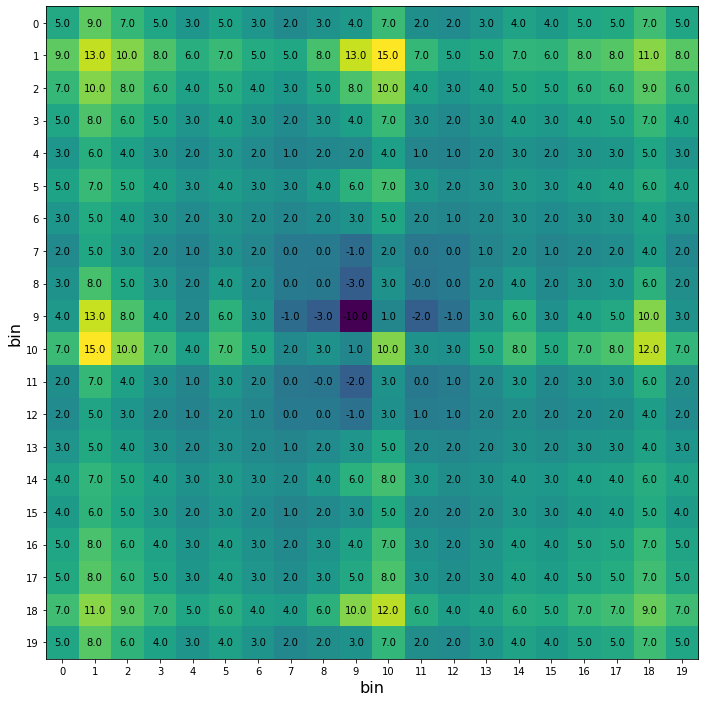

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(rho_matrix)


for i in range(20):
    for j in range(20):
        text = ax.text(j, i, np.round(rho_matrix[i, j], 0),
                       ha="center", va="center", color="black")
        
ax.set_xlabel('bin', fontsize=16)
ax.set_ylabel('bin', fontsize=16)
ax.set_xticks(np.arange(20))
ax.set_yticks(np.arange(20))